## Data Analyst Project Sprint 6 
Ice shop sells videogames for all kind of platforms in all around the wolrd, let's take a look of their sales on 2016 to predict and take desicions for the next year 2017

In [181]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mt
import os

In [182]:
current_path = os.getcwd()
games_path = os.path.join(current_path, 'games.csv')
games_df = pd.read_csv(games_path)
lower_columns = []
for column in games_df:
    lower = column.lower()
    lower_columns.append(lower)
games_df.columns = lower_columns
print(games_df.columns)
print()
print(games_df.head())
print()
games_df.info()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8 

# Cleaning data of nulls.

In [183]:
#limpieza de columna 'year_of_release'
yr_nulls = games_df['year_of_release'].isna()
yr_mean = games_df['year_of_release'].mean()
yr_med = games_df['year_of_release'].median()
print('Year of release mean: ', yr_mean)
print('year of realease median: ', yr_med)
games_df['year_of_release'] = games_df['year_of_release'].fillna(yr_med).astype(int)
#limpieza de columnas 'name' & 'genre' 
nm_null = games_df['name'].isna()
print(games_df[nm_null])
games_df = games_df.dropna(subset=['name', 'genre'])
#limpiza de columna 'user_score'
us_nulls = games_df['user_score'].isna()
us_mean = games_df['user_score'].replace(
    'tbd', np.nan).dropna().astype(float).mean()
us_med = games_df['user_score'].replace(
    'tbd', np.nan).dropna().astype(float).median()
print('User score mean: ', us_mean)
print('User score median: ', us_med)
print(games_df[us_nulls])
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan).fillna(7.1).astype(float)
#limpieza de columna 'critic score'
cs_mean = games_df['critic_score'].dropna().mean()
cs_med = games_df['critic_score'].dropna().median()
print('Critic score mean: ', cs_mean)
print('Critic score median: ', cs_med)
games_df['critic_score'] = games_df['critic_score'].fillna(0)
#limpieza de columna 'rating'
print(games_df['rating'].unique())
games_df['rating'] = games_df['rating'].fillna('Unk')
print()
print()
games_df.info()

Year of release mean:  2006.4846163200777
year of realease median:  2007.0
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
User score mean:  7.125046113306983
User score median:  7.5
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation 

Talking about why nulls exists in the dataset, for the column name & genre there is the possibility that the videogame were not registered by any excuse. Talking about the other columns to fill all the nulls was necesary to verify the diferences between the average and median to know if there was a values that could be to high or lower into the data, for the columns that doesn't have this kind of abnormal values I've replace the nulls with the mean. In the column 'user_score' there is no a indicator of where and how the dataset is going to be updated, talking about videogames, could be possible that those games are not released for public, or mayber there is another reason to have 'tbd' in their rows, anyway I decided to convert it to nan and then to de average value of the column.  

For some columns the type ob data registered is wrong, so I decided to convert them into the type of data that the columns that are not nulls could be: float or int. This will be helpfull for the future analysis. 

# Lets take a look if there is a duplicated rows or values.

In [184]:
# First of all, let's check all the dataset
print(games_df.duplicated().value_counts())
# Now, let's chek for the only columns that could have a false duplicates
print(games_df['name'].sort_values(ascending=True).unique())
print()
print(games_df['platform'].sort_values(ascending=True).unique())

False    16713
Name: count, dtype: int64
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!']

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']


It looks that there is no duplicates

In [185]:
games_df['total_sales'] = games_df['eu_sales']+games_df['jp_sales']+games_df['na_sales']+games_df['other_sales']
print(games_df.head())
print()
games_df.info()

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           0.0         7.1    Unk   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           0.0         7.1    Unk   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

## Let's check the data to find important keys

In [186]:
# Games per year. 
games_per_year = games_df.groupby(['year_of_release']).agg('count').drop(columns=['platform','total_sales','genre','na_sales','eu_sales','jp_sales', 'other_sales','critic_score','user_score','rating'])
print(games_per_year.head())
print('-------------------------------------------')
pt_games_year = games_df.pivot_table(index=games_df['year_of_release'], columns='genre', values='name', aggfunc='count' )
print(pt_games_year.head())

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
-------------------------------------------
genre            Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
year_of_release                                                                
1980                1.0        NaN       1.0   4.0       NaN     NaN     NaN   
1981               25.0        NaN       NaN   NaN       3.0     2.0     1.0   
1982               18.0        NaN       NaN   1.0       5.0     3.0     2.0   
1983                7.0        1.0       NaN   1.0       5.0     1.0     NaN   
1984                1.0        NaN       NaN   1.0       1.0     3.0     3.0   

genre            Role-Playing  Shooter  Simulation  Sports  Strategy  
year_of_release                                                       
1980                      NaN      2.0         NaN     1.0       NaN  
1981                      Na

In the last code cell we have information of the total of games released on every year, and a pivot table with the information per genre. 

In [187]:
numeric_columns = ['na_sales', 'eu_sales',
                   'jp_sales', 'other_sales', 'total_sales', 'critic_score']
games_by_platform = games_df.groupby(['platform', 'year_of_release'])[numeric_columns].agg('sum').reset_index()
print(games_by_platform)
print(type(games_by_platform))
print(games_by_platform['platform'].unique())

    platform  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0       2600             1980     10.59      0.67      0.00         0.12   
1       2600             1981     33.40      1.96      0.00         0.32   
2       2600             1982     26.92      1.65      0.00         0.31   
3       2600             1983      5.44      0.34      0.00         0.06   
4       2600             1984      0.26      0.01      0.00         0.00   
..       ...              ...       ...       ...       ...          ...   
239       XB             2008      0.13      0.04      0.00         0.01   
240     XOne             2013     11.85      5.34      0.02         1.75   
241     XOne             2014     30.97     18.15      0.14         4.81   
242     XOne             2015     36.03     18.47      0.17         5.47   
243     XOne             2016     14.27      9.63      0.01         2.24   

     total_sales  critic_score  
0          11.38           0.0  
1          35.68     

C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\1311088064.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[10, 6])


<Figure size 1000x600 with 0 Axes>

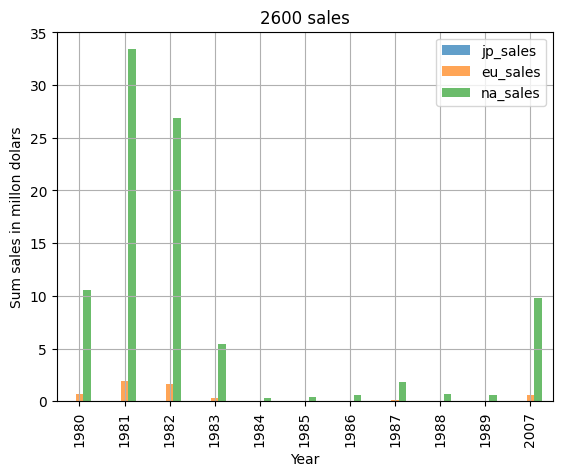

<Figure size 1000x600 with 0 Axes>

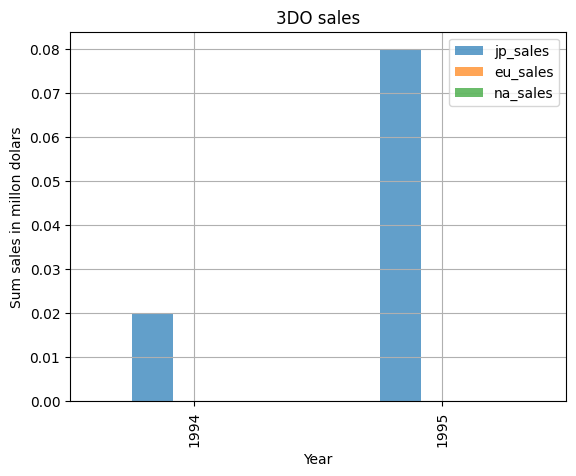

<Figure size 1000x600 with 0 Axes>

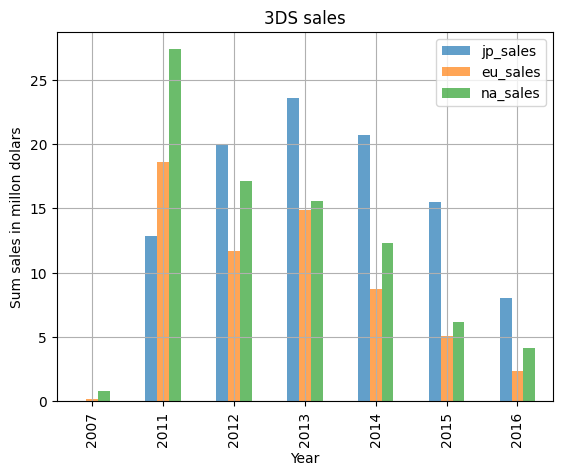

<Figure size 1000x600 with 0 Axes>

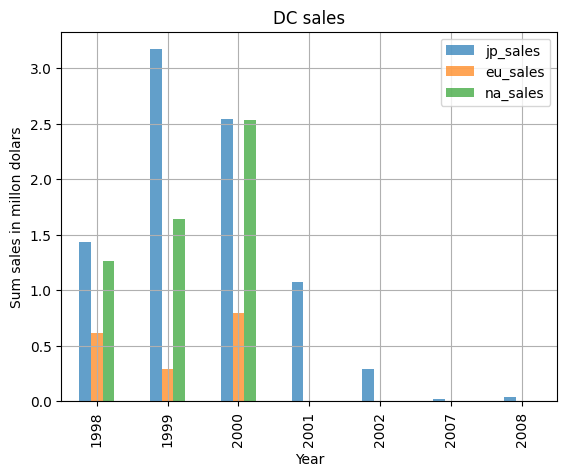

<Figure size 1000x600 with 0 Axes>

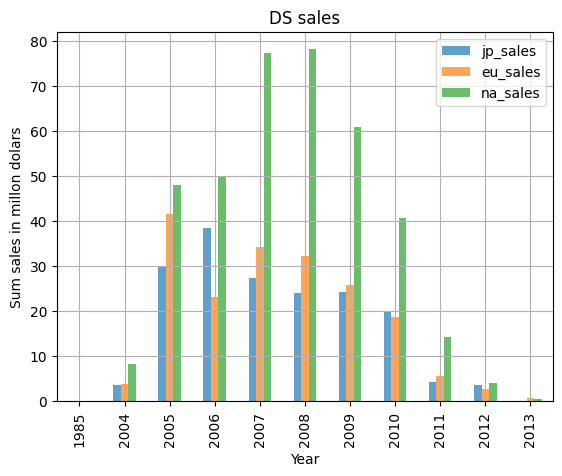

<Figure size 1000x600 with 0 Axes>

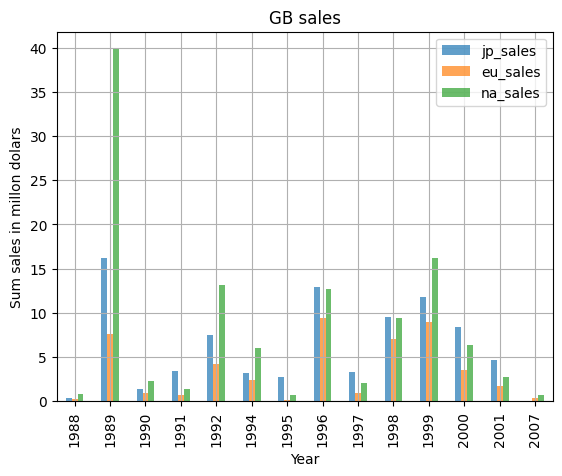

<Figure size 1000x600 with 0 Axes>

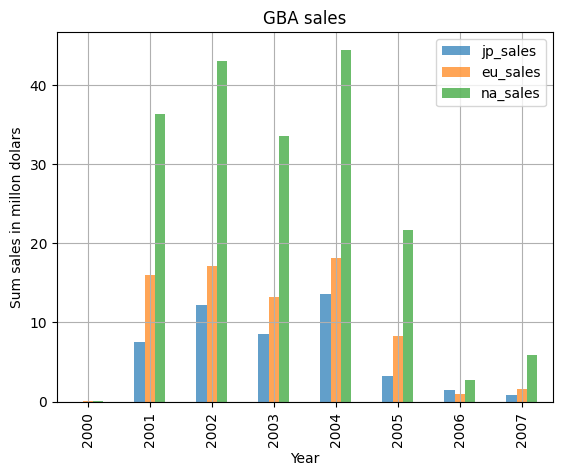

<Figure size 1000x600 with 0 Axes>

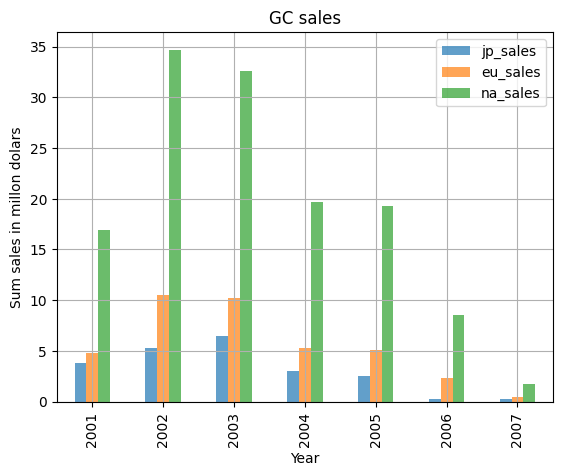

<Figure size 1000x600 with 0 Axes>

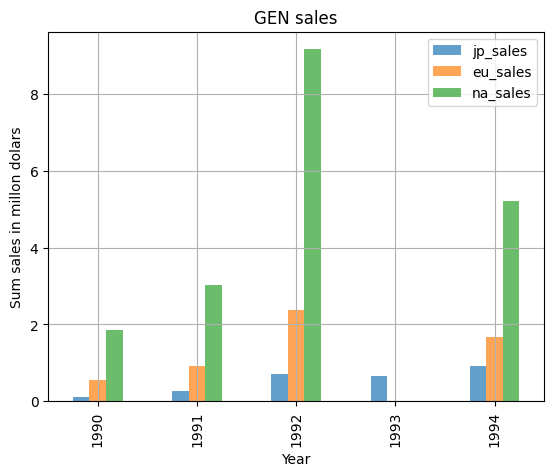

<Figure size 1000x600 with 0 Axes>

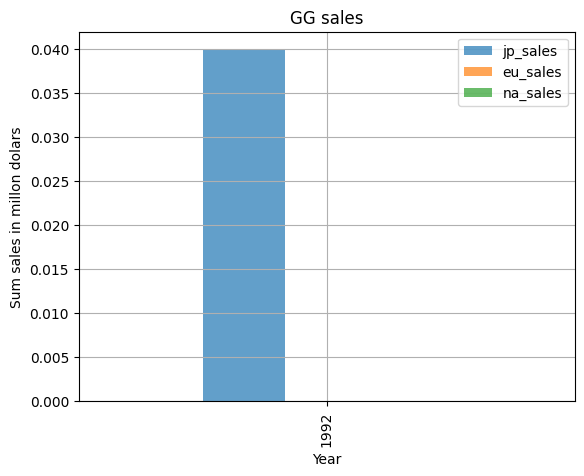

<Figure size 1000x600 with 0 Axes>

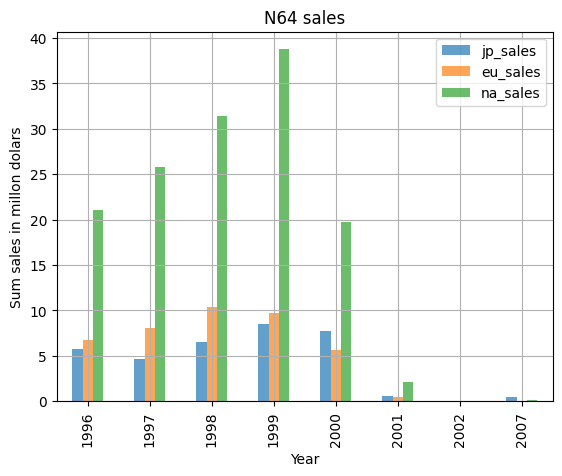

<Figure size 1000x600 with 0 Axes>

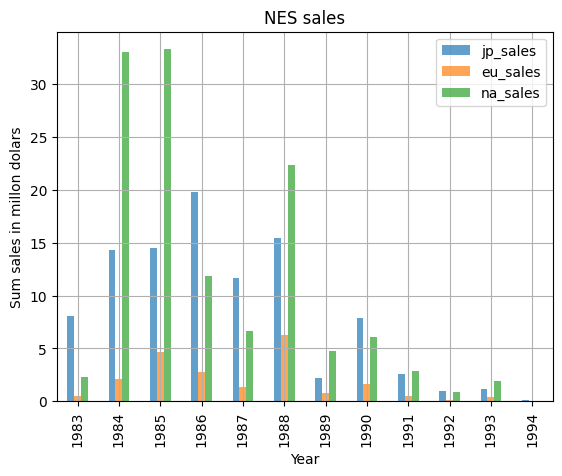

<Figure size 1000x600 with 0 Axes>

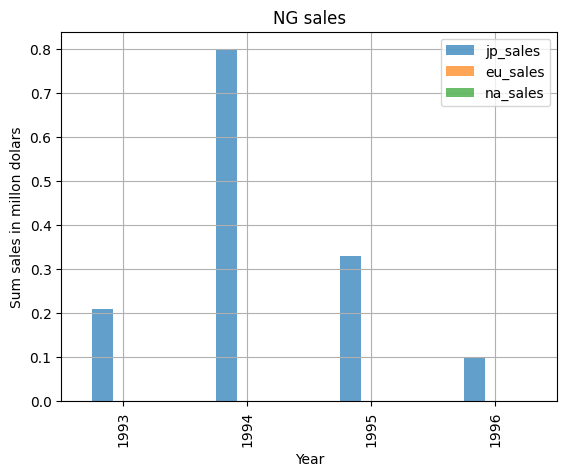

<Figure size 1000x600 with 0 Axes>

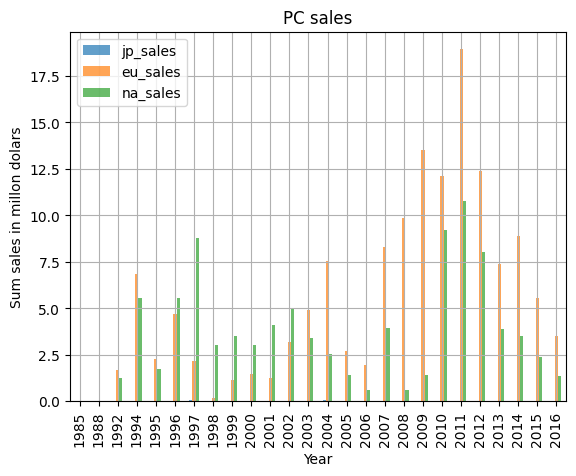

<Figure size 1000x600 with 0 Axes>

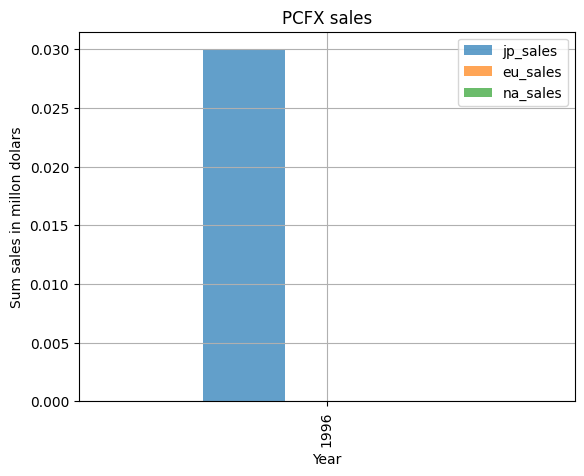

<Figure size 1000x600 with 0 Axes>

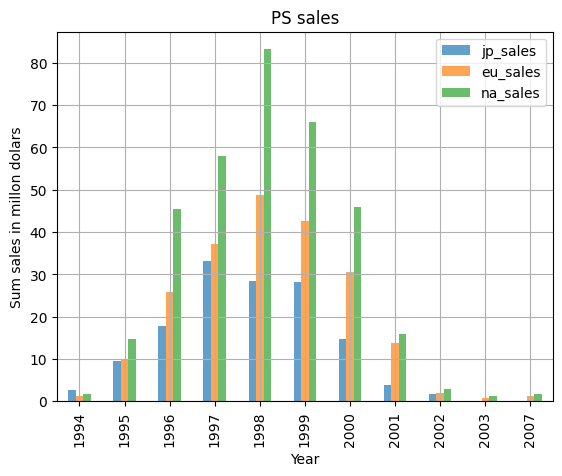

<Figure size 1000x600 with 0 Axes>

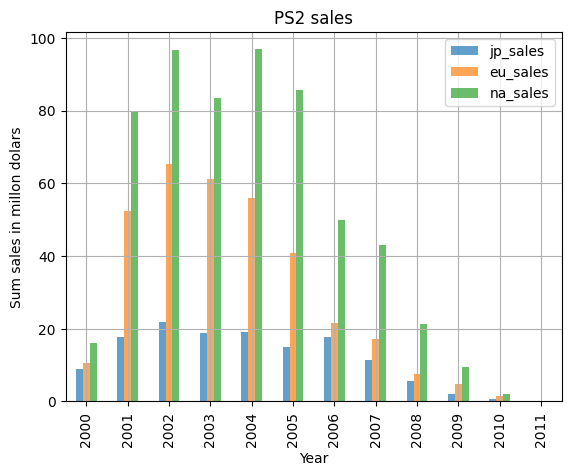

<Figure size 1000x600 with 0 Axes>

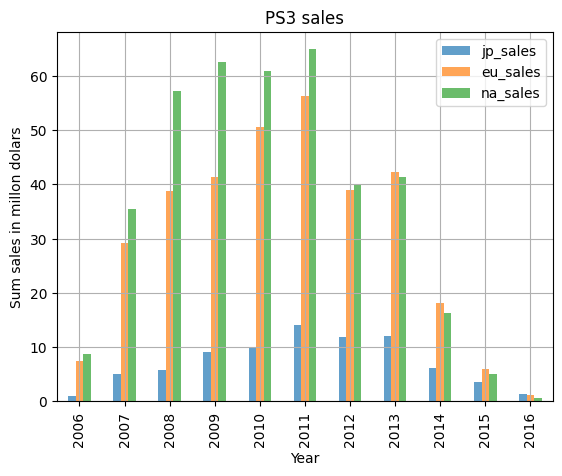

<Figure size 1000x600 with 0 Axes>

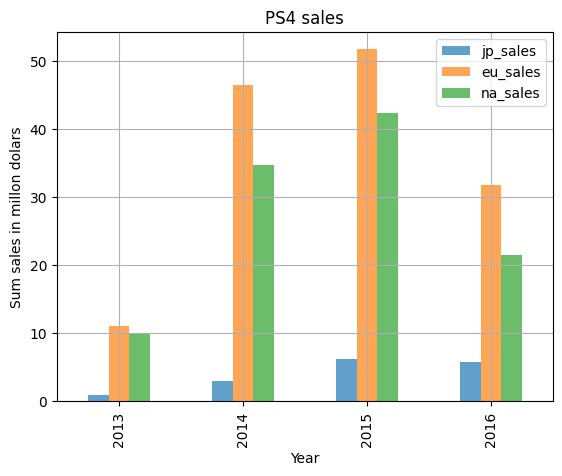

<Figure size 1000x600 with 0 Axes>

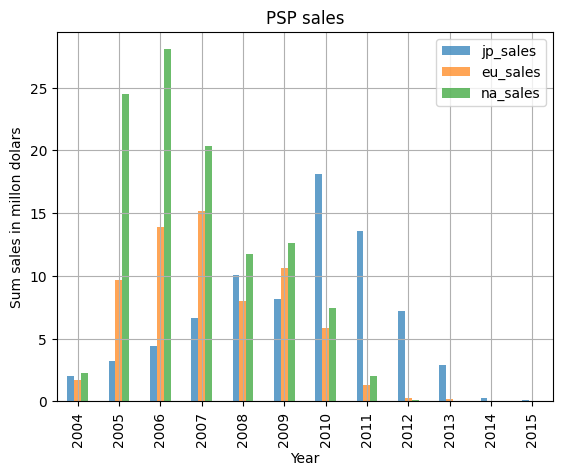

<Figure size 1000x600 with 0 Axes>

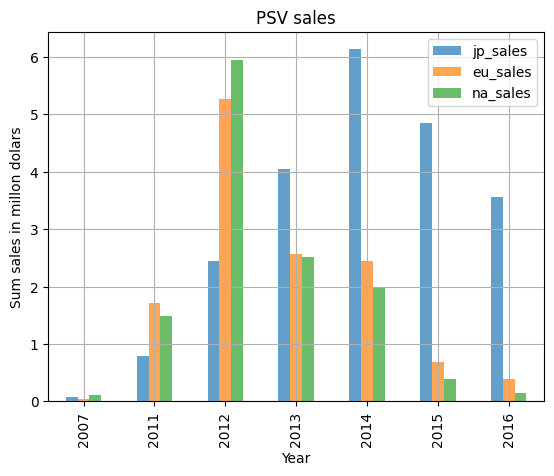

<Figure size 1000x600 with 0 Axes>

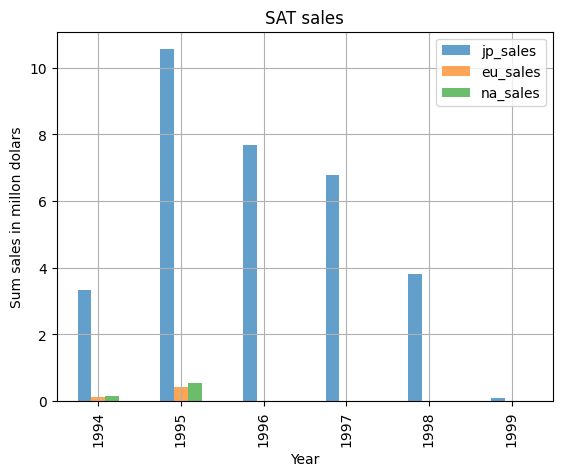

<Figure size 1000x600 with 0 Axes>

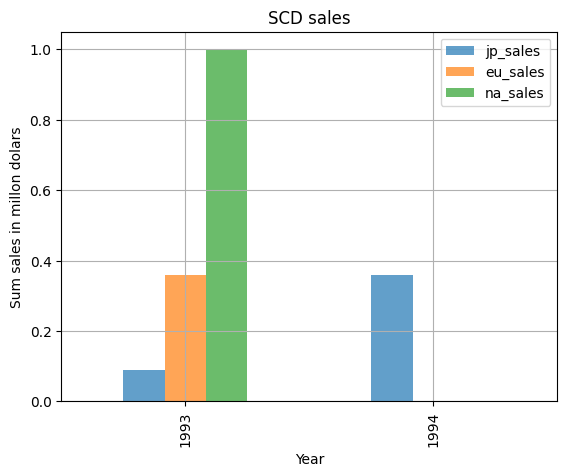

<Figure size 1000x600 with 0 Axes>

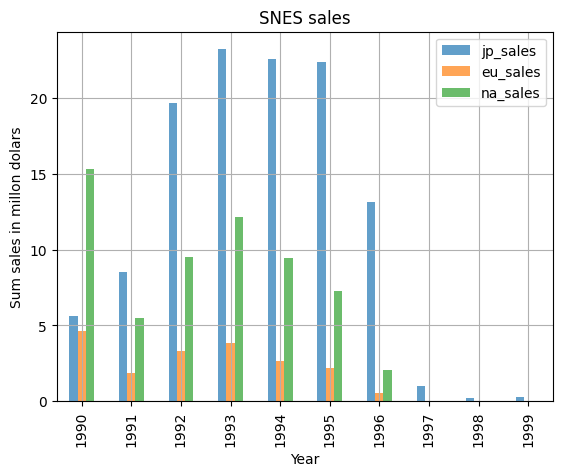

<Figure size 1000x600 with 0 Axes>

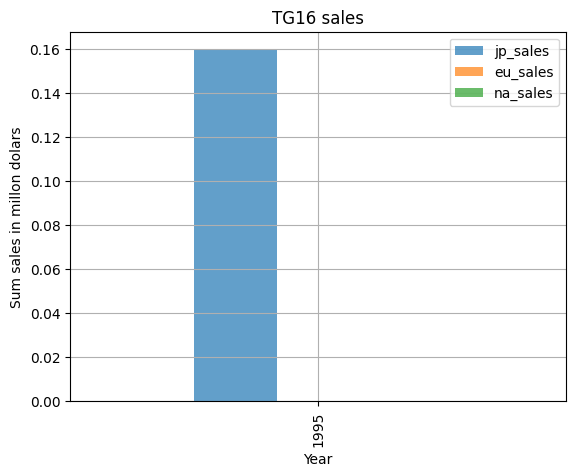

<Figure size 1000x600 with 0 Axes>

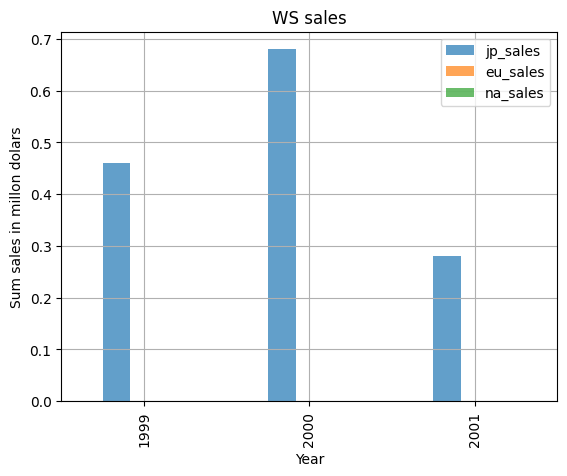

<Figure size 1000x600 with 0 Axes>

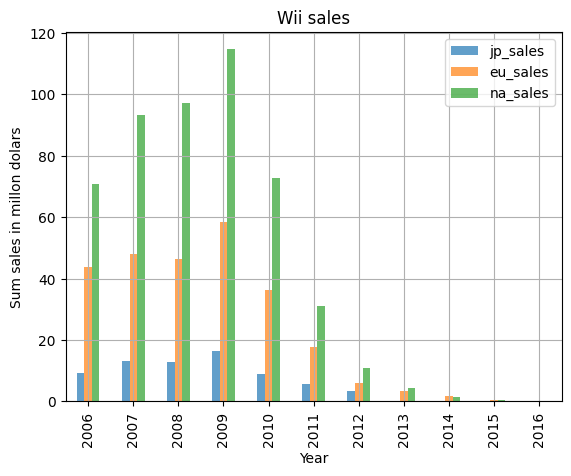

<Figure size 1000x600 with 0 Axes>

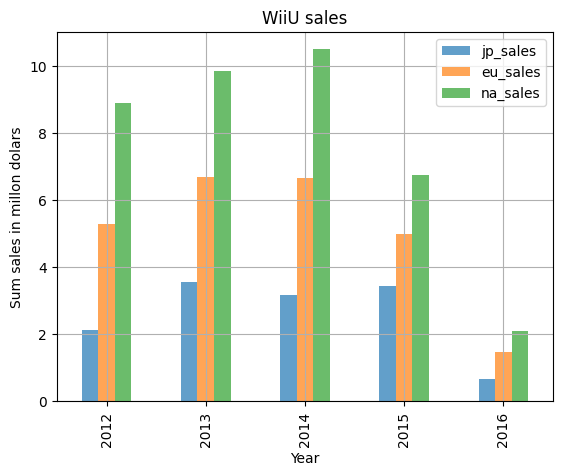

<Figure size 1000x600 with 0 Axes>

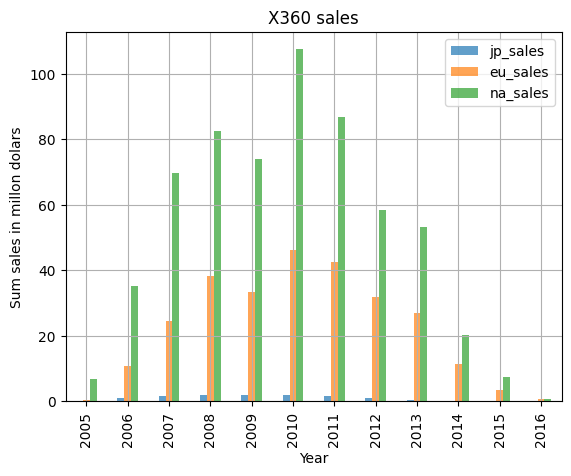

<Figure size 1000x600 with 0 Axes>

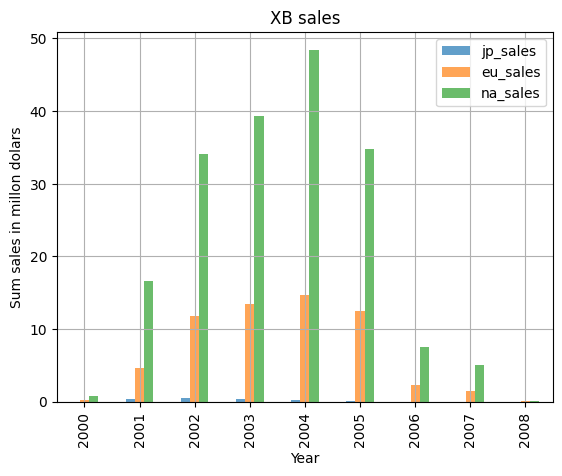

<Figure size 1000x600 with 0 Axes>

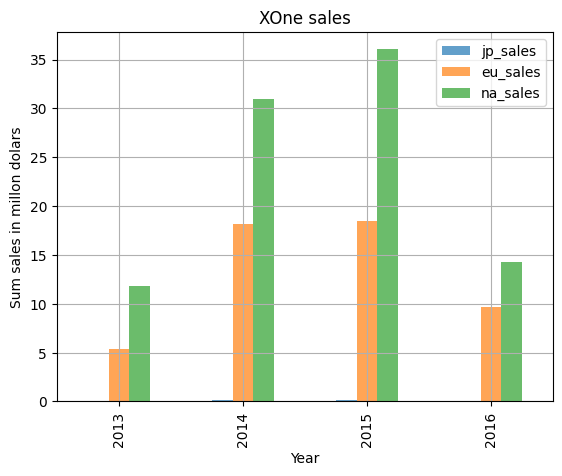

In [188]:
def console_sales(platform):
    for plat in platform:
        plt.figure(figsize=[10, 6])
        games_by_platform[games_by_platform['platform'] == plat].plot(kind='bar', x='year_of_release', y=[
                                                                      'jp_sales', 'eu_sales', 'na_sales'], alpha=0.7, xlabel='Year', ylabel='Sum sales in millon dolars', title=plat + ' sales', grid=True)
    return plt.show

each_platform_sales = console_sales(games_by_platform['platform'].unique())

<Axes: title={'center': 'Existence of platform sales per year'}, xlabel='Years with sales', ylabel='platform'>

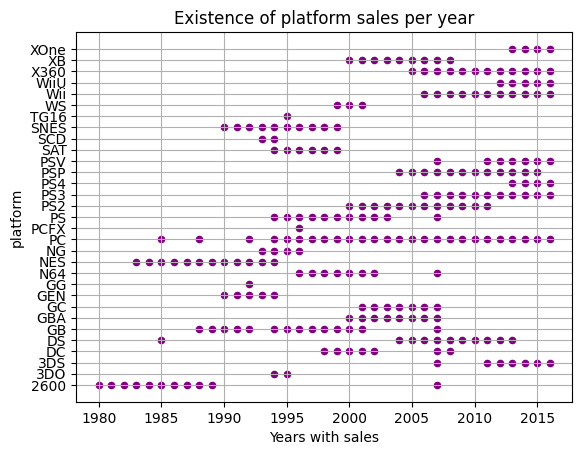

In [189]:
games_by_platform.plot(kind='scatter', x='year_of_release', y='platform', grid=True, xlabel='Years with sales', title='Existence of platform sales per year', color='purple')

As we can see, most of the platforms have a lifecycle of 10 years average, but every 2 to 5 years there is a new platform in the market. There is only one exception: the PC. 

Due to the lifecyle and end of life for the platforms, for the analysis and predictions for the year 2017, I'll segregate and ignore the platforms that doesn't have any sale from year 2007 to 2016 and I'll try to focus on platforms that just started with sales since 2011 to 2016.  

In [190]:
games_df_red = games_df[games_df['year_of_release'].isin([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])]
print(games_df_red.head())
print('--------------------------------------------------------------------------------')
games_df_red.info()

                         name platform  year_of_release     genre  na_sales  \
2              Mario Kart Wii      Wii             2008    Racing     15.68   
3           Wii Sports Resort      Wii             2009    Sports     15.61   
8   New Super Mario Bros. Wii      Wii             2009  Platform     14.44   
13                    Wii Fit      Wii             2007    Sports      8.92   
14         Kinect Adventures!     X360             2010      Misc     15.00   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
2      12.76      3.79         3.29          82.0         8.3      E   
3      10.93      3.28         2.95          80.0         8.0      E   
8       6.94      4.70         2.24          87.0         8.4      E   
13      8.03      3.60         2.15          80.0         7.7      E   
14      4.89      0.24         1.69          61.0         6.3      E   

    total_sales  
2         35.52  
3         32.77  
8         28.32  
13        22.70  
14

In [191]:
platform_sales = games_df_red.groupby(['platform', 'year_of_release'])[numeric_columns].agg('sum').reset_index()
print(platform_sales.sort_values(by='total_sales', ascending=False).head(10))
print('---------------------------------------')
print(platform_sales.sort_values(by='total_sales', ascending=False).tail(10))

   platform  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
69      Wii             2009    114.55     58.31     16.57        17.54   
68      Wii             2008     97.12     46.52     12.69        14.99   
85     X360             2010    107.38     46.31      2.11        14.23   
67      Wii             2007     93.17     47.85     13.17        14.91   
41      PS3             2011     64.88     56.24     14.10        21.56   
10       DS             2007     77.34     34.27     27.36        11.31   
11       DS             2008     78.12     32.24     24.01        10.94   
86     X360             2011     86.75     42.58      1.78        12.73   
40      PS3             2010     60.99     50.50      9.87        20.81   
83     X360             2008     82.51     38.16      1.89        12.70   

    total_sales  critic_score  
69       206.97        9351.0  
68       171.32        8660.0  
85       170.03        8937.0  
67       169.10        8337.0  
41       156.7

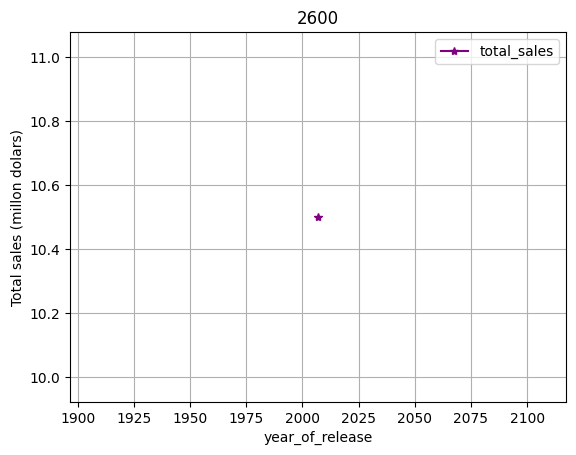

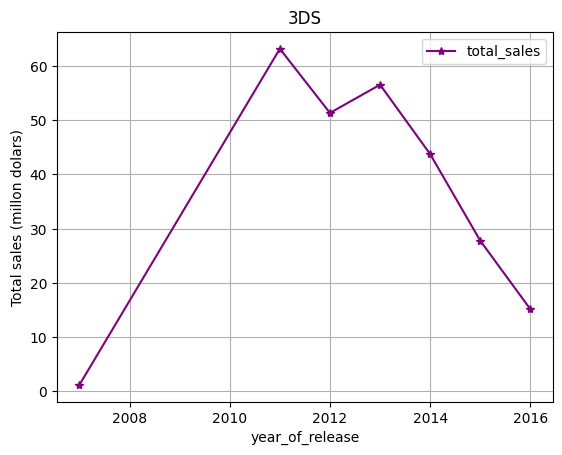

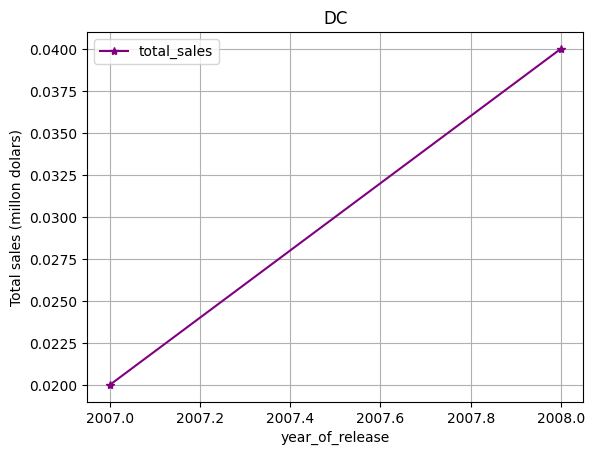

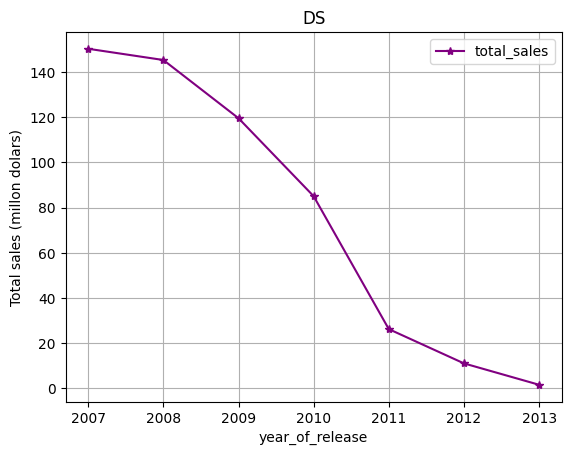

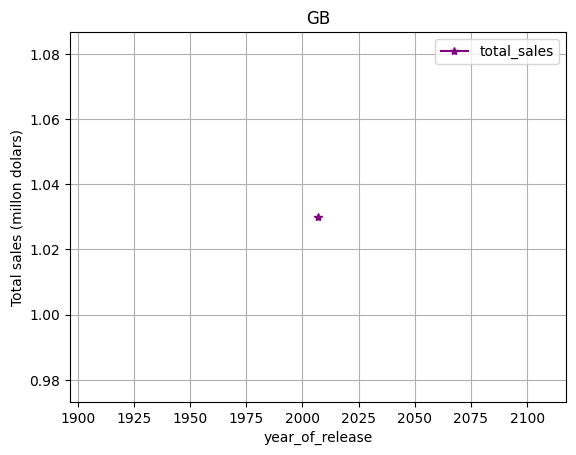

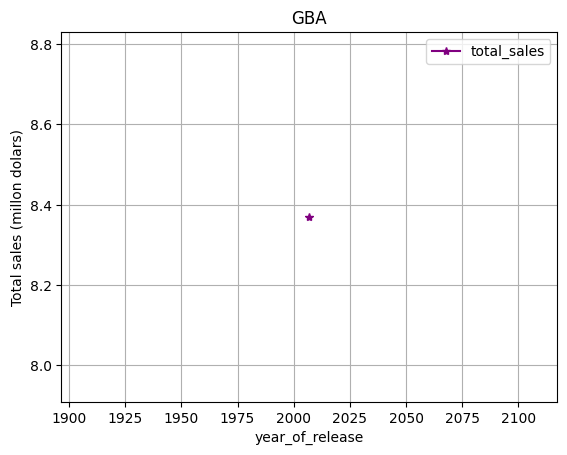

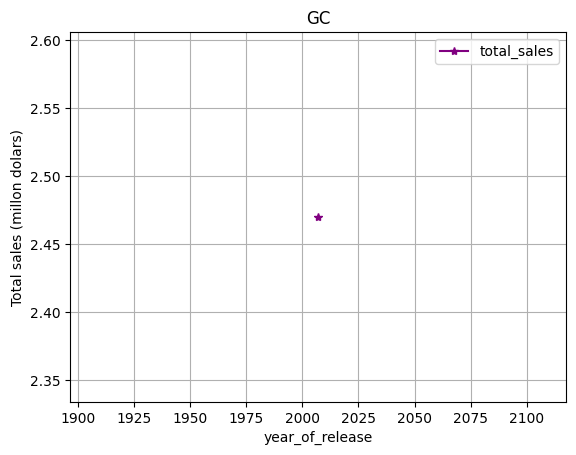

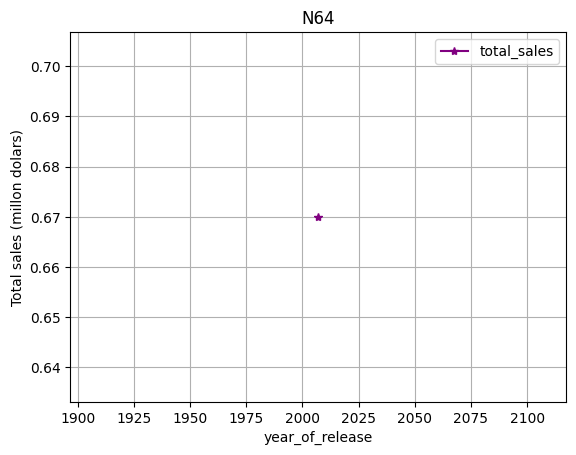

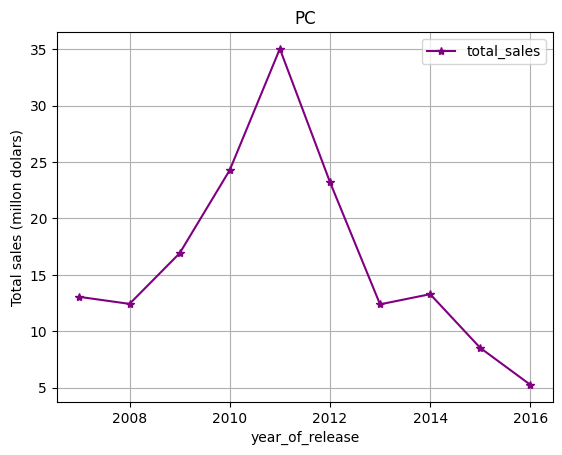

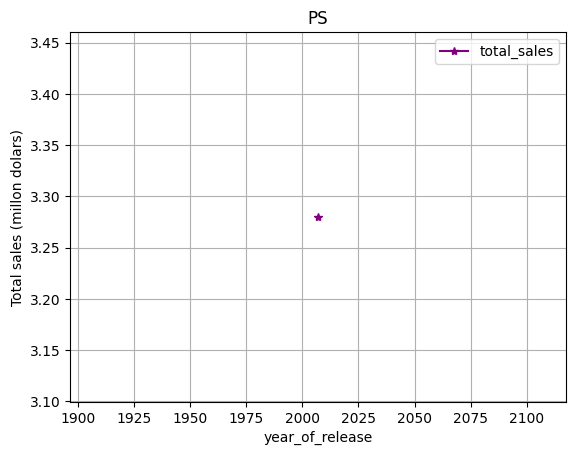

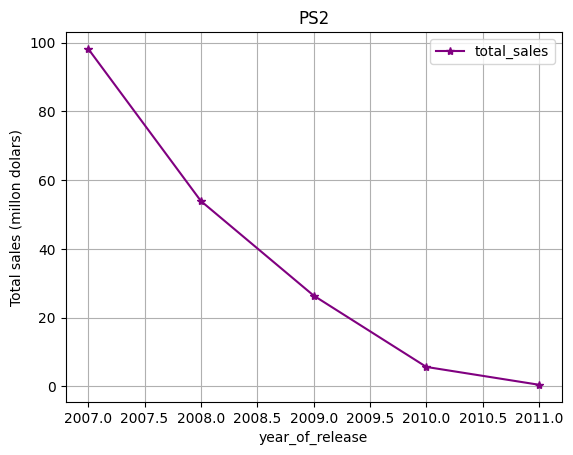

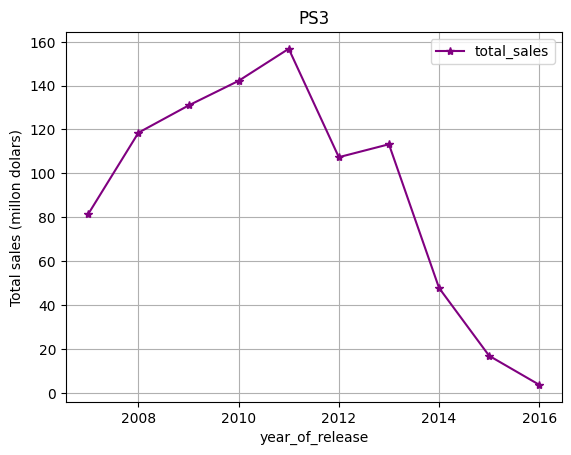

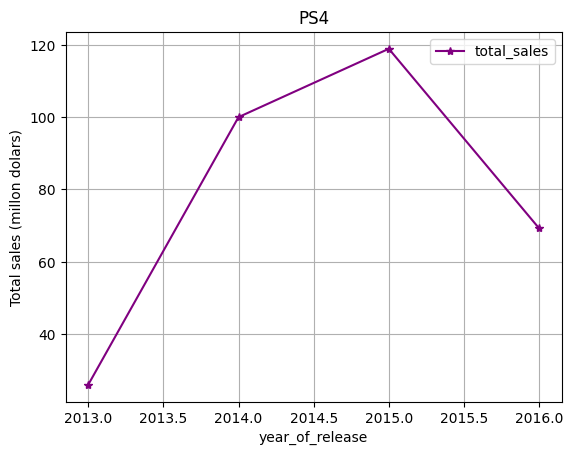

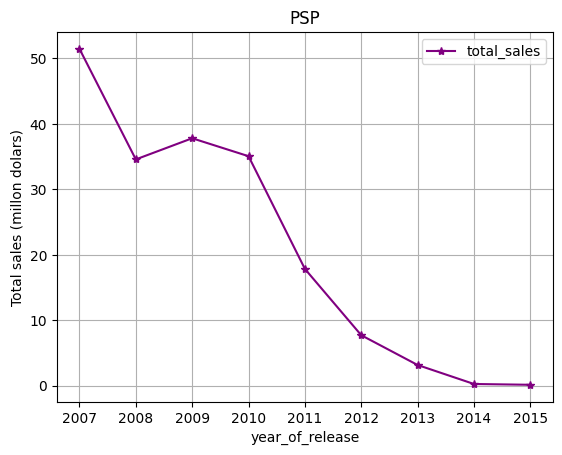

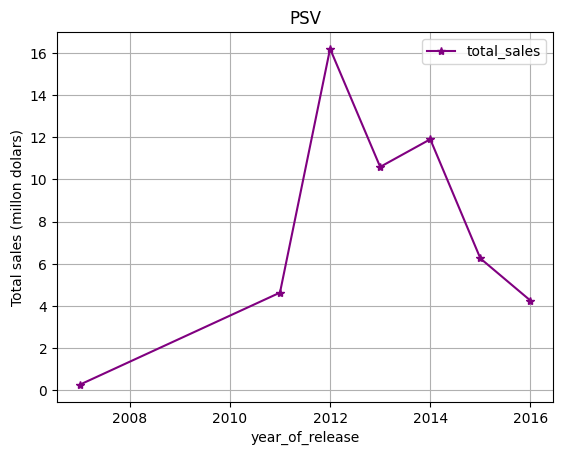

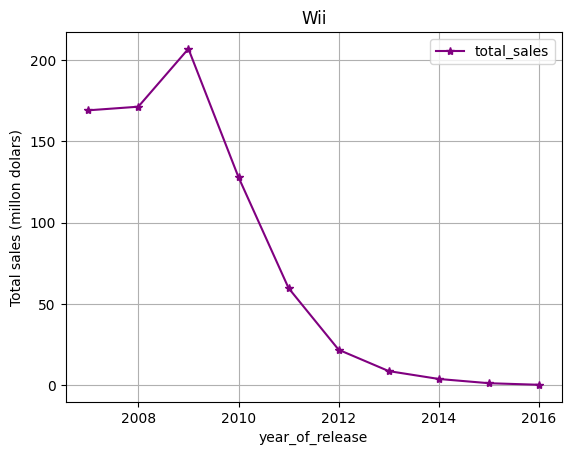

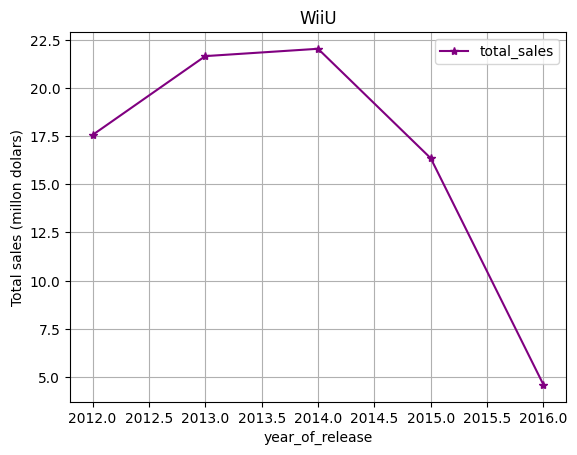

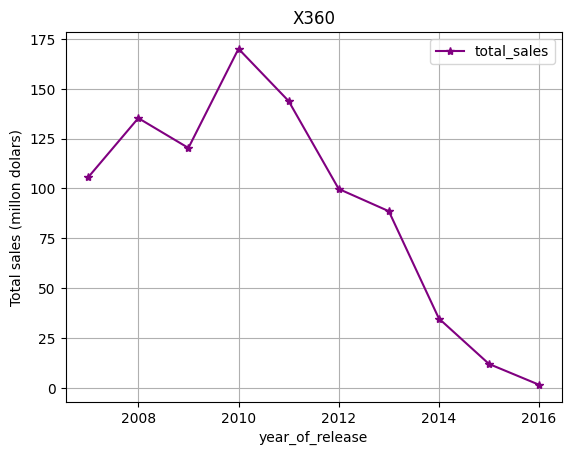

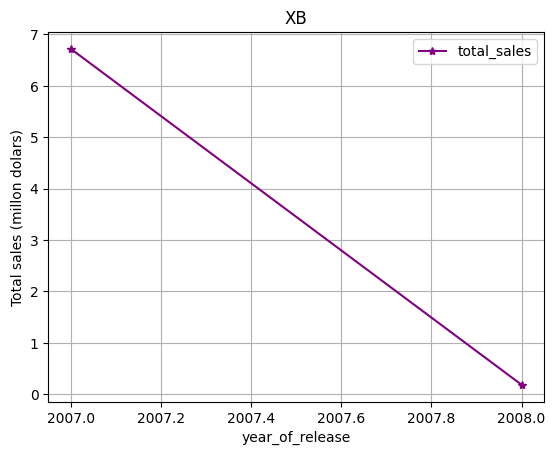

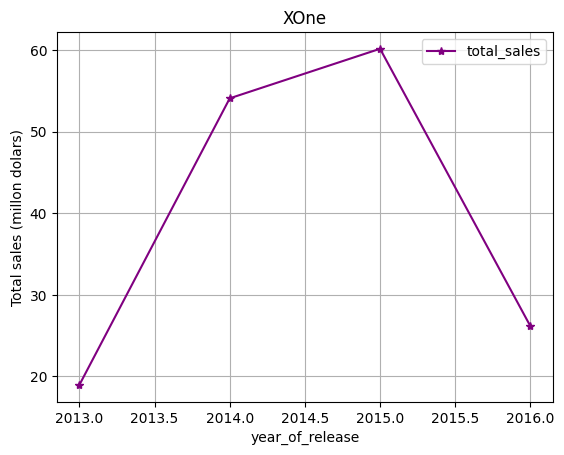

In [192]:
for platform in platform_sales['platform'].unique():
    platform_sales[platform_sales['platform'] == platform].plot(
        kind='line', style='-*', ylabel='Total sales (millon dolars)', x='year_of_release', y='total_sales', title=platform, grid=True, color='purple')
    plt.show

As we can see in the charts, there are a lot of platforms that could have future sales in 2017, for example XOne, PS4 & 3DS, those are the strongest platforms for 2017, other platforms to keep in mind are X360, PS3 & PSV or WiiU because this ones even if they have started with sales before 2008, they still have god sales in 2016.

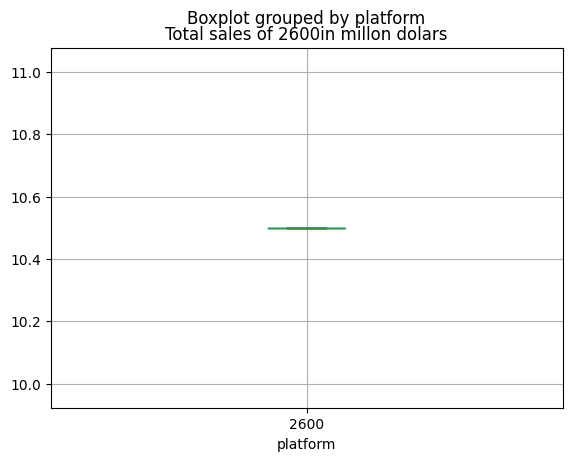

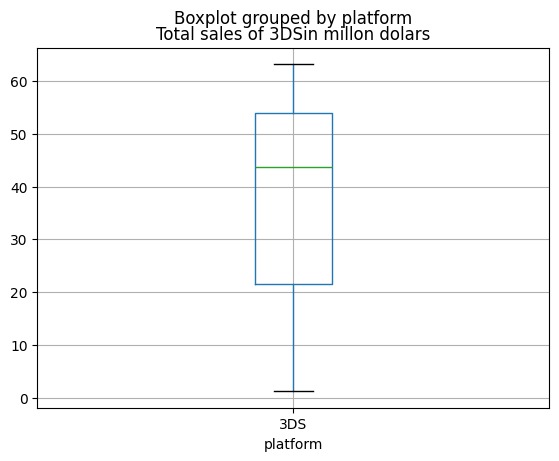

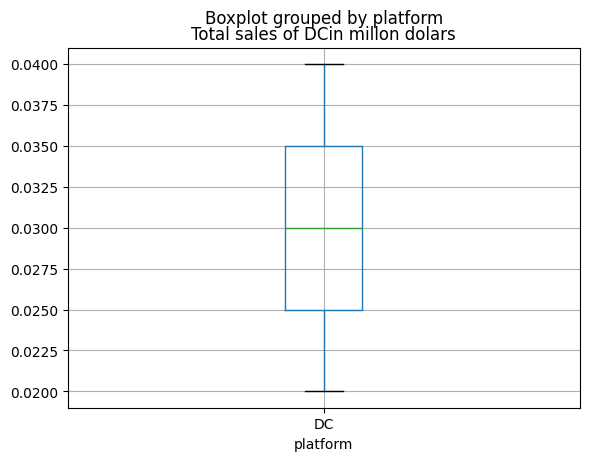

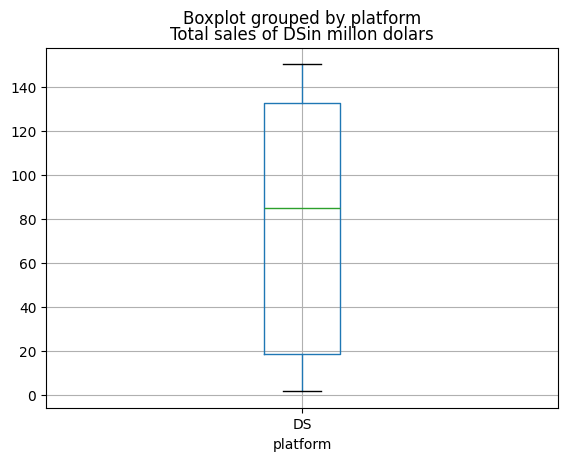

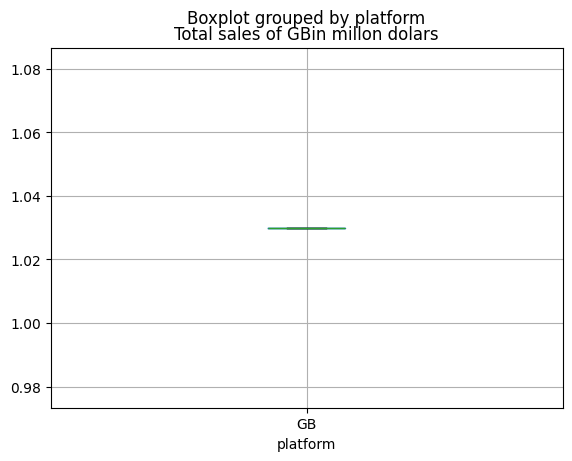

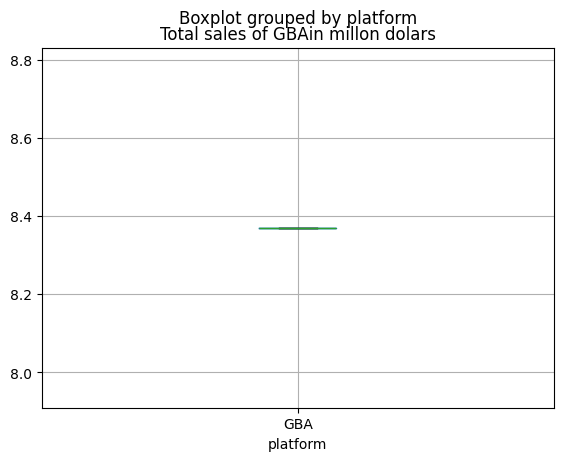

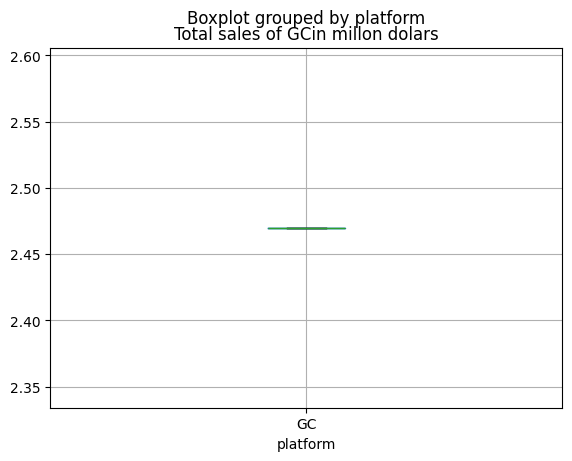

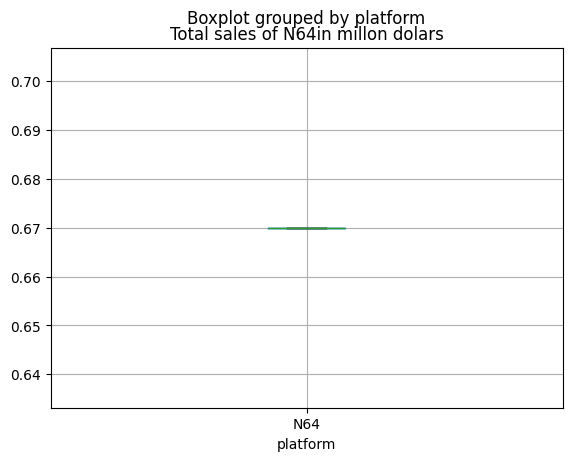

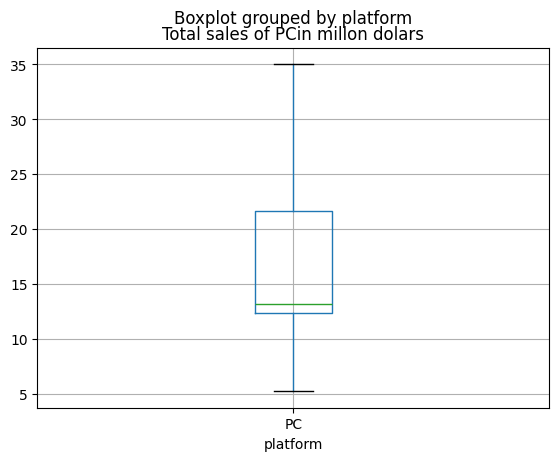

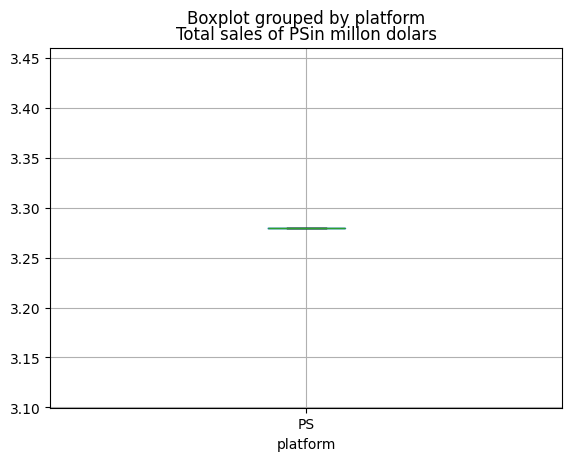

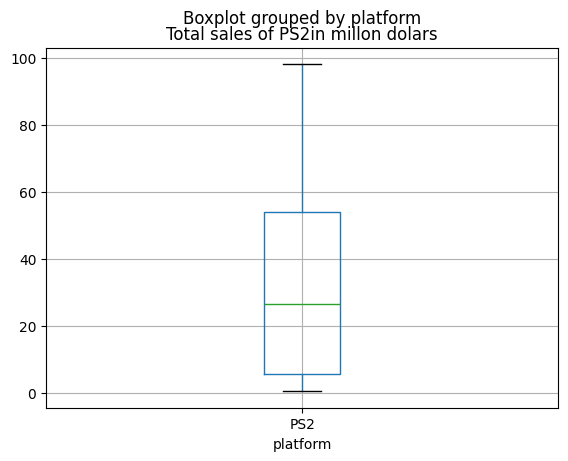

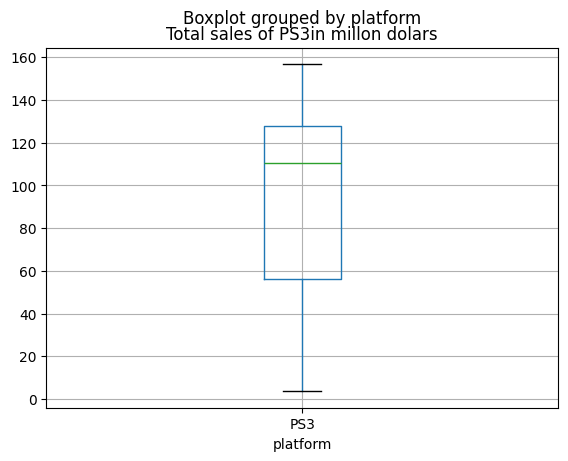

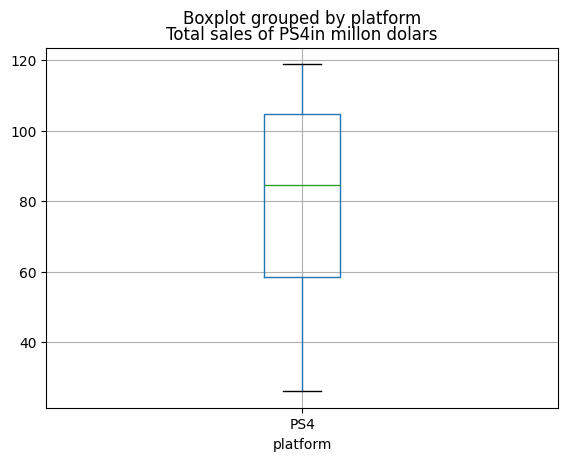

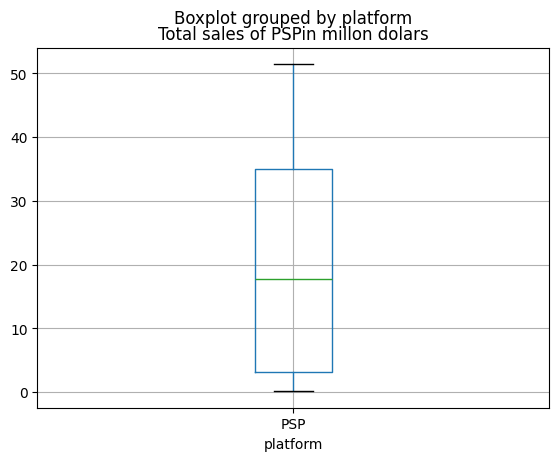

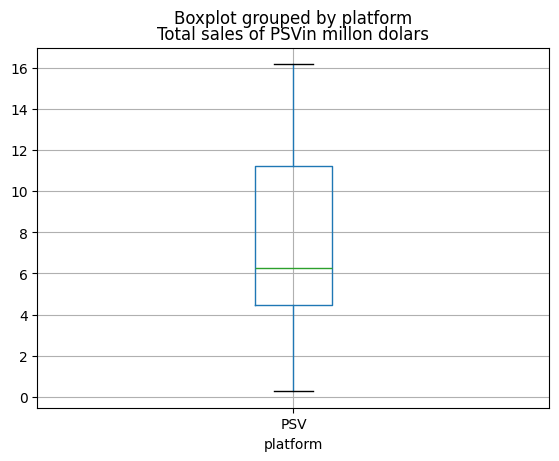

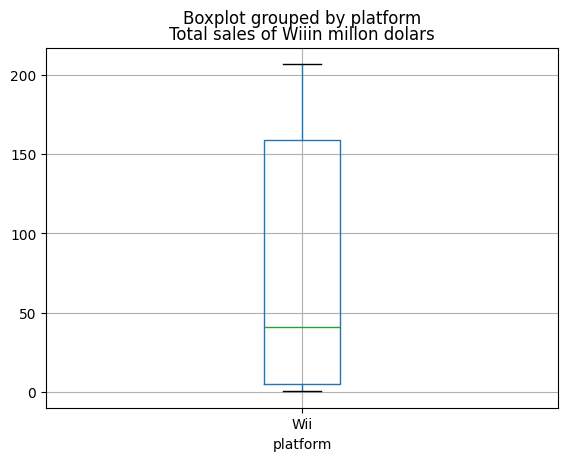

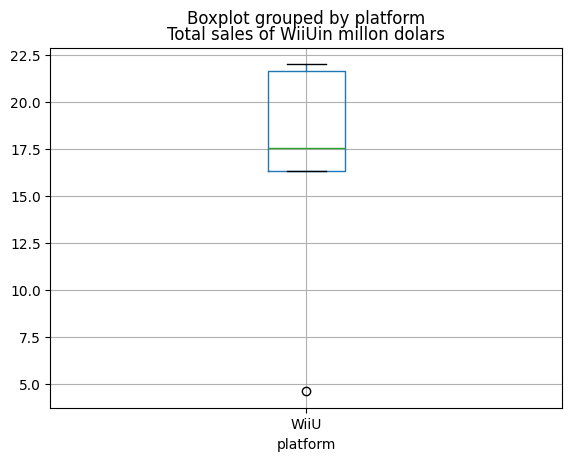

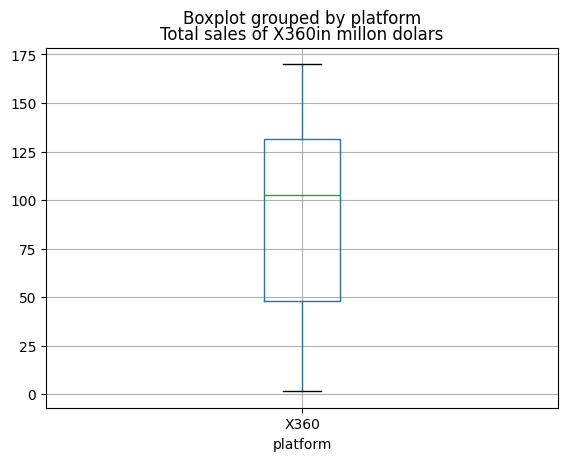

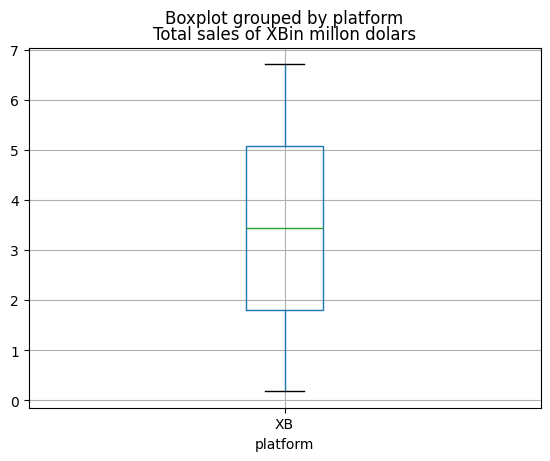

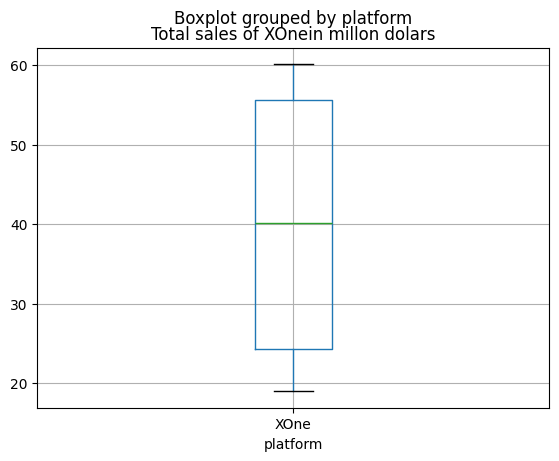

In [193]:
def platforms_sales(platform):
    for plat in platform:
        platform_sales[platform_sales['platform']==plat].boxplot(column='total_sales', by='platform')
        plt.title('Total sales of '+plat + 'in millon dolars')
    return plt.show
boxplots = platforms_sales(platform_sales['platform'].unique())

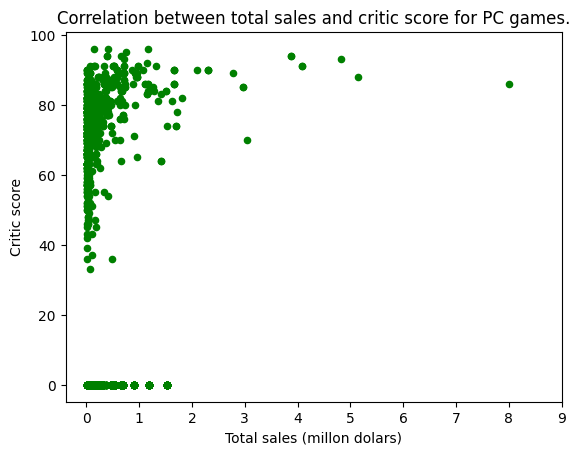

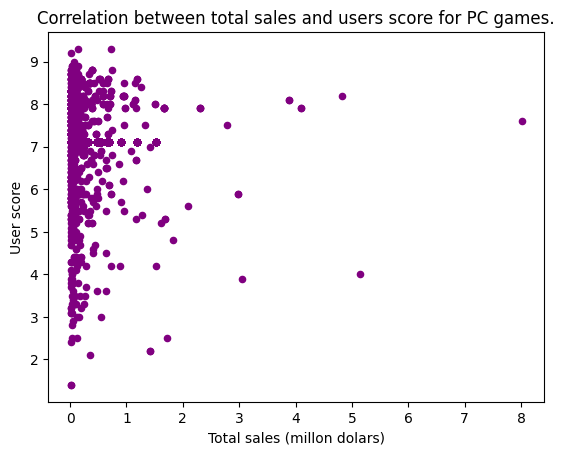

In [194]:
games_df_critics = games_df[['platform', 'user_score', 'critic_score']]
pc_sales_critics = games_df_red[games_df_red['platform']=='PC'].merge(games_df_critics)

pc_sales_critics.plot(kind='scatter', x='total_sales', y='critic_score', xticks=[
                      0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ylabel='Critic score', xlabel='Total sales (millon dolars)', title='Correlation between total sales and critic score for PC games.', color='green')
pc_sales_critics.plot(kind='scatter', x='total_sales', y='user_score', ylabel='User score', xlabel='Total sales (millon dolars)', title='Correlation between total sales and users score for PC games.', color='purple')
plt.show()

In [195]:
critic_sales_cov = np.cov(pc_sales_critics['total_sales'],pc_sales_critics['critic_score'])
critic_sales_cov = critic_sales_cov[0][1]
print('Critic covariance: ', critic_sales_cov)
user_sales_cov = np.cov(pc_sales_critics['total_sales'], pc_sales_critics['user_score'])
user_sales_cov = user_sales_cov[0][1]
print()
print('User covariance: ', user_sales_cov)

Critic covariance:  0.41086993495054497

User covariance:  -0.000632466204901199


For any reason both group of critic shows a correlation close to 0, but the valuation that came from professionals shows a little positive influence for the videogames increasing their sales. 

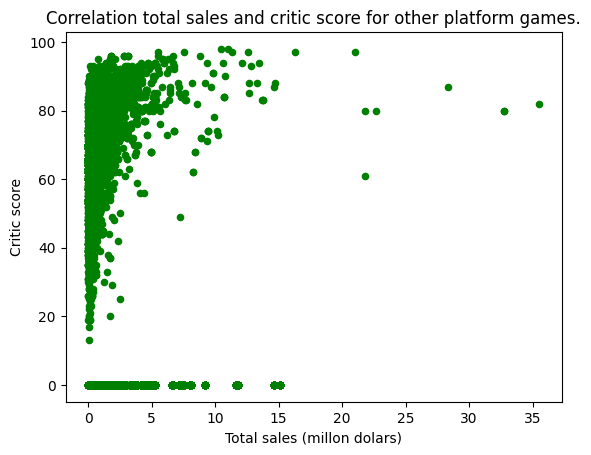

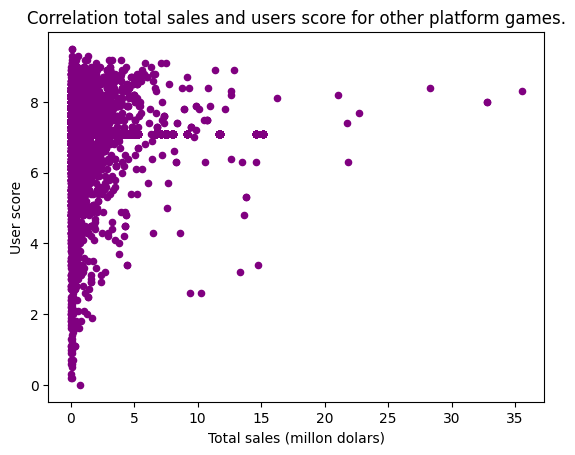

In [199]:
other_sales_critics = games_df_red[games_df_red['platform'] != 'PC'].merge(
    games_df_critics)

other_sales_critics.plot(kind='scatter', x='total_sales', y='critic_score', ylabel='Critic score', xlabel='Total sales (millon dolars)', title='Correlation total sales and critic score for other platform games.', color='green')
other_sales_critics.plot(kind='scatter', x='total_sales', y='user_score', ylabel='User score', xlabel='Total sales (millon dolars)',
                      title='Correlation total sales and users score for other platform games.', color='purple')
plt.show()

Looks like all the videogames has the same behavior.

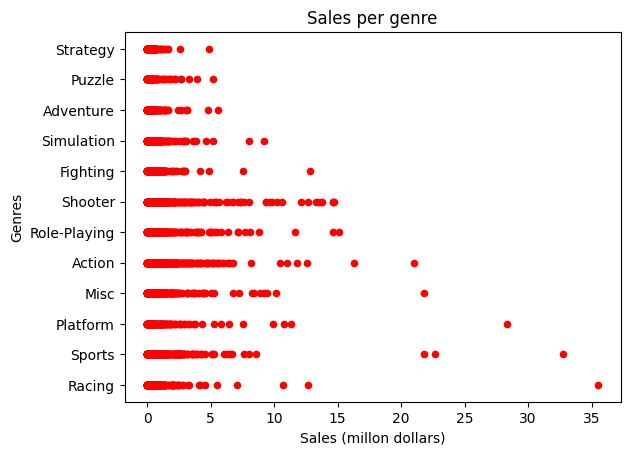

In [234]:
games_df_red.plot(kind='scatter', y='genre', x='total_sales', color='red', xlabel= 'Sales (millon dollars)', ylabel='Genres', title='Sales per genre' )
plt.show()

Data show us that the most rentable genre of videogames is 'Racing' followed by 'Sports' and 'Platform' and the less rentable genre is 'Strategy' then 'Puzzle' and 'Adventure'.

Europe region
The top 5 platforms by sales are:
  platform  eu_sales
0      PS3    322.91
1     X360    259.49
2      Wii    218.59
3      PS4    141.09
4       DS    120.40
--------------------------------------------
The top 5 genres by sales are:
     genre  eu_sales
0   Action    343.81
1  Shooter    232.98
2   Sports    216.95
3     Misc    129.76
4   Racing    106.65


C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plat_df = new_df[[prof+'_sales','platform']].groupby(by='platform').agg(sum).reset_index().sort_values(by=prof+'_sales', ascending=False)
C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  genre_df = new_df[[prof+'_sales', 'genre']].groupby(by='genre').agg(
C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:12: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future versi

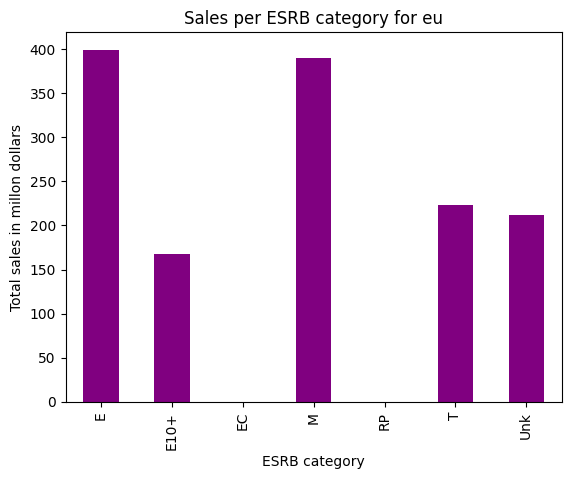

North America region
The top 5 platforms by sales are:
  platform  na_sales
0     X360    560.41
1      Wii    426.04
2      PS3    384.65
3       DS    276.07
4      PS4    108.74
--------------------------------------------
The top 5 genres by sales are:
          genre  na_sales
0        Action    508.01
1       Shooter    357.52
2        Sports    337.09
3          Misc    266.86
4  Role-Playing    176.18


C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plat_df = new_df[[prof+'_sales','platform']].groupby(by='platform').agg(sum).reset_index().sort_values(by=prof+'_sales', ascending=False)
C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  genre_df = new_df[[prof+'_sales', 'genre']].groupby(by='genre').agg(
C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:12: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future versi

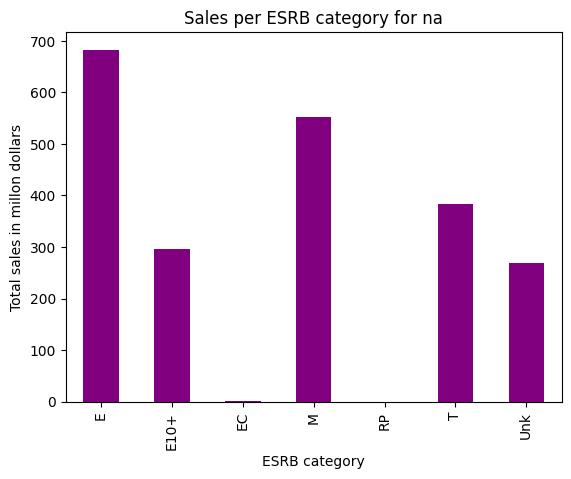

Japanese region
The top 5 platforms by sales are:
  platform  jp_sales
0       DS    103.48
1      3DS    100.67
2      PS3     79.11
3      PSP     67.14
4      Wii     60.18
--------------------------------------------
The top 5 genres by sales are:
          genre  jp_sales
0  Role-Playing    152.57
1        Action     97.58
2          Misc     49.88
3        Sports     40.89
4     Adventure     26.97


C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  plat_df = new_df[[prof+'_sales','platform']].groupby(by='platform').agg(sum).reset_index().sort_values(by=prof+'_sales', ascending=False)
C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:8: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  genre_df = new_df[[prof+'_sales', 'genre']].groupby(by='genre').agg(
C:\Users\elmis\AppData\Local\Temp\ipykernel_24780\2971823070.py:12: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future versi

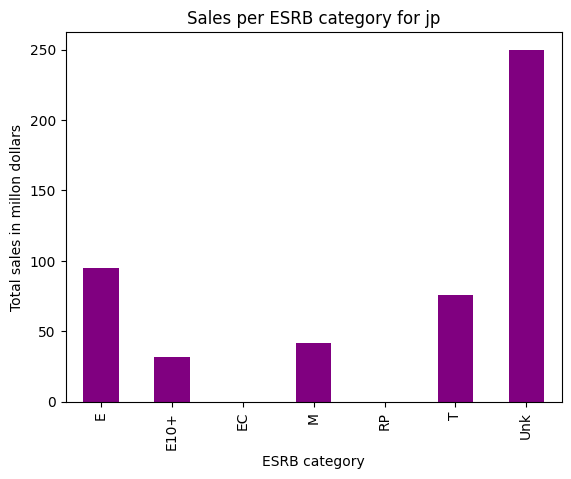

In [235]:
def profile(prof):
    new_df = games_df_red[[prof+'_sales','platform','genre','rating']]
    
    plat_df = new_df[[prof+'_sales','platform']].groupby(by='platform').agg(sum).reset_index().sort_values(by=prof+'_sales', ascending=False)
    print('The top 5 platforms by sales are:')
    print(plat_df.head().reset_index().drop(columns='index'))
    print('--------------------------------------------')
    genre_df = new_df[[prof+'_sales', 'genre']].groupby(by='genre').agg(
        sum).reset_index().sort_values(by=prof+'_sales', ascending=False)
    print('The top 5 genres by sales are:')
    print(genre_df.head().reset_index().drop(columns='index'))
    new_df.groupby('rating').agg(sum).reset_index().plot(kind='bar', y=prof+'_sales', x='rating', title='Sales per ESRB category for '+prof, legend=False, color='purple', xlabel='ESRB category', ylabel='Total sales in millon dollars')
    plt.show()
    return
print('Europe region')
eu_prof = profile('eu')
print('North America region')
na_prof = profile('na')
print('Japanese region')
jp_prof = profile('jp')

## Stats analyse


1.- The user score average between Xbox One & PC platforms are the same. 
 - H0: There is no difference between both user score average for both platforms.
 - H1: Users that valuate the same videogames for the different platforms give different score.

In [231]:
a = 0.05
result_t, p_value = st.ttest_ind(games_df_red[games_df_red['platform'] == 'XOne']['user_score'],
                                 games_df_red[games_df_red['platform'] == 'PC']['user_score'], equal_var=False)

print('P value: ', p_value)
if (p_value < a):
    print('Reject H0')
else:
    print("Can't reject H0")
print()

P value:  0.07470057295618669
Can't reject H0



2.- The user score average for Action & Sprots are diferents
 - H0: Users average score for videogames clasified in Action genre is different against videogames clasified in Sports genre.
 - H1: Users average score for videogames clasified in Action genre is the same with videogames clasified in Sports genre.

In [232]:
a = 0.05
result_t, p_value = st.ttest_ind(games_df_red[games_df_red['genre'] == 'Action']['user_score'],
                                 games_df_red[games_df_red['genre'] == 'Sports']['user_score'], equal_var=False)

print('P value: ', p_value)
if (p_value < a):
    print('Reject H0')
else:
    print("Can't reject H0")
print()

P value:  8.140840021278996e-09
Reject H0



Due to the numeric nature of the data that I've compared in both hypothesis I decided to use the ttest that compares the mean between two numeric data sets, both hypothesis are related to the differences in the average of user valuations for videogames, so the method t-test was the best option to compare that diferences. 

Also both hypothesis were to easy to stablish beacause both are to similar, both depended on the valuation for videogames in different platforms and genres. I just needed to identify wich will be the average value for both data sets and alpha value that I set as 0.05 that is an standard. 

## Conclusion

There are too many different factors that could affect and change the predictions for the future sales of videogames, for example the region, platform, genre of the videogame and also the ESRB classification.

Nevertheless with the different strategies and methods used in this proyect I can say that a huge amount of sales in videogames for the year 2017 could be limited to videogames catalogued in 'Sports', 'Action' and 'Shooter genre, in the most recent platforms as Xbox One, PS4, maybe including Xbox 360 and PS3 with ESRB classification M or e in the regions of Europe and North America, for the Asian region (Japan) the possible gross amount of sales will be limited to the most reccent prtable platforms of Nintendo and PS3 and 4, with videogames catalogued as 'Role-playing', 'Action' and 'Music'.